In [1]:
# Import libraries
import pandas as pdimport pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("C:/Users/neele/Downloads/archive (3)/house.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4045 non-null   int64  
 1   net_sqm          4045 non-null   float64
 2   center_distance  4045 non-null   float64
 3   metro_distance   4045 non-null   float64
 4   floor            4045 non-null   int64  
 5   age              4045 non-null   int64  
 6   price            4045 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 221.3 KB


In [4]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4045.000000,4045.000000,4045.000000,4045.000000,4045.00000,4045.000000,4045.000000
mean,3.649691,111.628225,1007.115236,89.412340,9.55822,48.360198,95733.956499
std,2.465720,89.459307,578.706749,71.000440,7.70210,28.153029,3770.581749
min,1.000000,-8.499109,10.060000,-168.492932,1.00000,0.000000,84153.485790
25%,2.000000,50.168622,510.630000,39.283508,2.00000,24.000000,93199.037388
50%,3.000000,86.381463,1009.410000,89.031988,8.00000,48.000000,95474.254973
75%,5.000000,144.767416,1493.410000,140.493035,16.00000,72.000000,97863.622299
max,17.000000,750.971604,1999.840000,330.275317,24.00000,97.000000,118134.771190


In [5]:
df.columns

Index(['bedroom_count', 'net_sqm', 'center_distance', 'metro_distance',
       'floor', 'age', 'price'],
      dtype='object')

## Classification


### Applying KNN & Random Forest

In [8]:

# Define the threshold to classify as 0 or 1
threshold = 100000  # Adjust this threshold as needed

# Convert to binary classification
df['price'] = (df['price'] > threshold).astype(int)

# Preprocess the data
# Assuming you have already handled missing values and categorical encoding
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Standardize the feature data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Apply k-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluate KNN performance
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn, zero_division=1)
knn_recall = recall_score(y_test, y_pred_knn, zero_division=1)
knn_f1_score = f1_score(y_test, y_pred_knn, zero_division=1)

print("KNN Classifier Metrics:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1_score}")


#  Apply Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Random Forest performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, zero_division=1)
rf_recall = recall_score(y_test, y_pred_rf, zero_division=1)
rf_f1_score = f1_score(y_test, y_pred_rf, zero_division=1)

print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1_score}")


KNN Classifier Metrics:
Accuracy: 0.957972805933251
Precision: 0.8648648648648649
Recall: 0.7272727272727273
F1 Score: 0.7901234567901235

Random Forest Classifier Metrics:
Accuracy: 0.9530284301606922
Precision: 0.8571428571428571
Recall: 0.6818181818181818
F1 Score: 0.759493670886076


## XGBoost

In [9]:
# XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate XGBoost performance
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb, zero_division=1)  # Handle zero division
xgb_recall = recall_score(y_test, y_pred_xgb, zero_division=1)  # Handle zero division
xgb_f1_score = f1_score(y_test, y_pred_xgb, zero_division=1)  # Handle zero division

print("\nXGBoost Classifier Metrics:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1_score}")


XGBoost Classifier Metrics:
Accuracy: 0.9567367119901112
Precision: 0.8192771084337349
Recall: 0.7727272727272727
F1 Score: 0.7953216374269007


## Perfromance Metrics for Classification Models

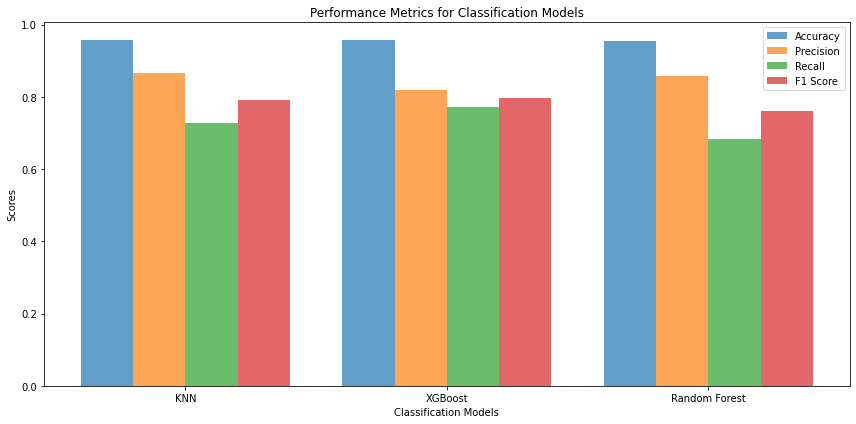

In [36]:


# Define the metrics for each model
models = ['KNN', 'XGBoost', 'Random Forest']
accuracy = [knn_accuracy, xgb_accuracy, rf_accuracy] 
precision = [knn_precision, xgb_precision, rf_precision] 
recall = [knn_recall, xgb_recall, rf_recall]  
f1_score = [knn_f1_score, xgb_f1_score, rf_f1_score]  

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
index = np.arange(len(models))

# Create subplots for each metric
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(index, accuracy, bar_width, label='Accuracy', alpha=0.7)
# Precision
plt.bar(index + bar_width, precision, bar_width, label='Precision', alpha=0.7)
# Recall
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', alpha=0.7)
# F1 Score
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score', alpha=0.7)


plt.xlabel('Classification Models')
plt.ylabel('Scores')
plt.title('Performance Metrics for Classification Models')
plt.xticks(index + 1.5 * bar_width, models)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
sequence_length = 10  
num_features = 6  
num_classes = 2  

# One-hot encode 
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


X_train_sequences = []
y_train_sequences = []

for i in range(len(X_train) - sequence_length + 1):
    X_train_sequences.append(X_train[i:i+sequence_length])
    y_train_sequences.append(y_train_encoded[i+sequence_length-1])

X_train_sequences = np.array(X_train_sequences)
y_train_sequences = np.array(y_train_sequences)

# Create sequences from your validation data
X_val_sequences = []
y_val_sequences = []

for i in range(len(X_val) - sequence_length + 1):
    X_val_sequences.append(X_val[i:i+sequence_length])
    y_val_sequences.append(y_val_encoded[i+sequence_length-1])

X_val_sequences = np.array(X_val_sequences)
y_val_sequences = np.array(y_val_sequences)

# Create sequences from your test data
X_test_sequences = []
y_test_sequences = []

for i in range(len(X_test) - sequence_length + 1):
    X_test_sequences.append(X_test[i:i+sequence_length])
    y_test_sequences.append(y_test_encoded[i+sequence_length-1])

X_test_sequences = np.array(X_test_sequences)
y_test_sequences = np.array(y_test_sequences)

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, num_features)))  # Adjust units and input shape
model.add(Dense(num_classes, activation='softmax'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model using X_train_sequences and y_train_sequences
model.fit(X_train_sequences, y_train_sequences, epochs=10, batch_size=32, validation_data=(X_val_sequences, y_val_sequences))

# Evaluate on test data
loss, accuracy = model.evaluate(X_test_sequences, y_test_sequences)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
65/65 [==============================] - 6s 25ms/step - loss: 0.3554 - accuracy: 0.8729 - val_loss: 0.2598 - val_accuracy: 0.8998
Epoch 2/10
65/65 [==============================] - 1s 11ms/step - loss: 0.2272 - accuracy: 0.8928 - val_loss: 0.1992 - val_accuracy: 0.9214
Epoch 3/10
65/65 [==============================] - 1s 10ms/step - loss: 0.1682 - accuracy: 0.9272 - val_loss: 0.1660 - val_accuracy: 0.9352
Epoch 4/10
65/65 [==============================] - 1s 11ms/step - loss: 0.1393 - accuracy: 0.9457 - val_loss: 0.1567 - val_accuracy: 0.9253
Epoch 5/10
65/65 [==============================] - 1s 12ms/step - loss: 0.1347 - accuracy: 0.9442 - val_loss: 0.1514 - val_accuracy: 0.9352
Epoch 6/10
65/65 [==============================] - 1s 11ms/step - loss: 0.1258 - accuracy: 0.9486 - val_loss: 0.1482 - val_accuracy: 0.9273
Epoch 7/10
65/65 [==============================] - 1s 11ms/step - loss: 0.1234 - accuracy: 0.9491 - val_loss: 0.1480 - val_accuracy: 0.9234
Epoch 8/10
65

## Hierarchical Clustering

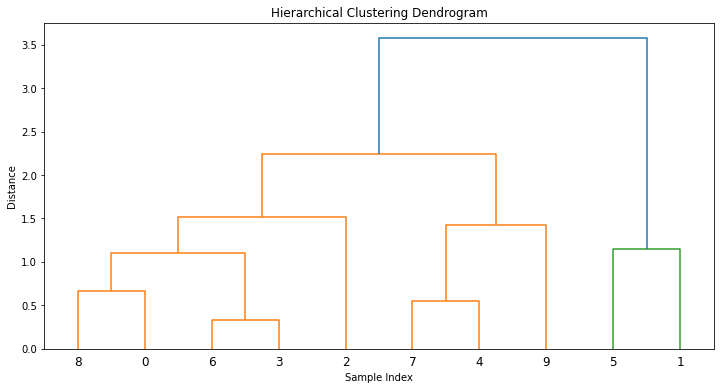

Cluster Assignments:
[2 1 2 2 2 1 2 2 2 2]


In [21]:
np.random.seed(0)
data = np.random.randn(10, 2)

# Perform hierarchical clustering
linked = linkage(data, 'ward')  # Using 'ward' linkage method

# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           labels=None,  # You can specify labels here if you have them
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Choose a threshold to cut the dendrogram (adjust as needed)
threshold = 2.5  # You can adjust this threshold

# Assign data points to clusters based on the threshold
clusters = fcluster(linked, threshold, criterion='distance')

# Print cluster assignments
print("Cluster Assignments:")
print(clusters)


### Regression

In [25]:
#Train dataset 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test,y_pred_linear)

print("linear Regression Metrics: ")
print(f"Mean Squared Error: {linear_mse}")
print(f"R-squared: {linear_r2}")

linear Regression Metrics: 
Mean Squared Error: 0.047952815144908505
R-squared: 0.5053554657537689


## Ridge Regression

In [31]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)  
ridge_reg.fit(X_train, y_train)

# Predict using the ridge regression model
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate the model
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Metrics:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"R-squared: {ridge_r2}")



Ridge Regression Metrics:
Mean Squared Error: 0.047952804726687545
R-squared: 0.5053555732201614


## Lasso Regression

In [33]:

lasso_reg = Lasso(alpha = 1.0)
lasso_reg.fit(X_train,y_train)

y_pred_lasso = lasso_reg.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Metrics:")
print(f"Mean Squared Error: {lasso_mse}")
print(f"R-squared: {lasso_r2}")


Lasso Regression Metrics:
Mean Squared Error: 0.0492924349920312
R-squared: 0.49153697285935594


## Combined Regression Plot

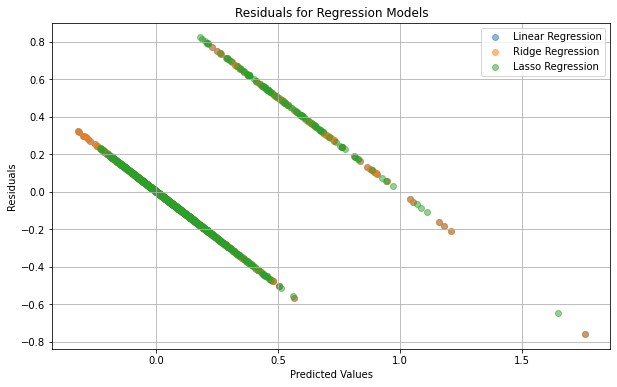

In [35]:
esiduals_linear = y_test - y_pred_linear
residuals_ridge = y_test - y_pred_ridge
residuals_lasso = y_test - y_pred_lasso

plt.figure(figsize=(10, 6))

plt.scatter(y_pred_linear, residuals_linear, label='Linear Regression', alpha=0.5)
plt.scatter(y_pred_ridge, residuals_ridge, label='Ridge Regression', alpha=0.5)
plt.scatter(y_pred_lasso, residuals_lasso, label='Lasso Regression', alpha=0.5)

plt.title('Residuals for Regression Models')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

plt.show()
